In [1]:
import pyaerocom as pya
import os
pya.change_verbosity('critical')

## Comparison of multiple variables based on model suite and observations

This notebook is based on netCDF files that contain data that has been colocated. The colocated data files can be created using the [ANALYSIS_SCRIPT.py](https://github.com/metno/pyaerocom-synthesis/blob/master/ANALYSIS_SCRIPT.py) file which is part of this repository. 

An overview of the available parameters, models and the corresponding obsnetworks used for the intercomparison study is provided below. 

### Setup paths and notebook options

#### Directory for colocated data files

In [2]:
DATA_DIR = pya.const.COLOCATEDDATADIR
#DATA_DIR =  '/Users/mschulz/data/pyaerocom-colocated'

# check if read is ok
if not os.access(DATA_DIR, os.R_OK):
    raise IOError('Cannot access data')
DATA_DIR

'/lustre/storeA/project/aerocom/aerocom2/pyaerocom_out/colocated_data'

### Model list

In [3]:
models = os.listdir(DATA_DIR)
models

['INCA-BCext_CTRL2016-PD',
 'GEOS5-freegcm_CTRL2016-PD',
 'GEOS-Chem-v11-01_AP3-CTRL2016-PD',
 'ECMWF-IFS-CY42R1-CAMS-RA-CTRL_AP3-CTRL2016-PD',
 'INCA-BCin_CTRL2016-PD',
 'SPRINTARS-T213_AP3-CTRL2016-PD',
 'ECMWF-IFS-CY43R1-CAMS-NITRATE-DEV_AP3-CTRL2016-PD',
 'ECHAM6-SALSA_CTRL2016-PD',
 'CNRM-AESM2_AP3-CTRL2016-PD',
 'ECHAM6-HAM2_AP3-CTRL2016-PD',
 'SPRINTARS-T106_AP3-CTRL2016-PD',
 'HadGEM3-GA7.1_AP3-CTRL2016-PD',
 'CNRM-AESM2Nud_AP3-CTRL2016-PD',
 'INCA_CTRL2016-PD',
 'GEOS5-assimilate_CTRL2016-PD',
 'ECHAM6.3-HAM2.3_AP3-CTRL2016-PD',
 'CAM5.3-Oslo_AP3-CTRL2016-PD']

#### Comment on colocated data files

The directory containing colocated data files (*DATA_DIR*) contains sub-directories for each model available. The colocated data files are named using the following convention:

*<var_name>_REF-<obsnetwork_id>_MOD-<model_id>_<ts_type_source>_<start_date>_<stop_date>_<ts_type>_<filter_name>_COLL.nc*

For instance:

*abs550aer_REF-AeronetInvV3Lev2.daily_MOD-INCA-BCext_CTRL2016-PD-3hourly_20100101_20101231_monthly_WORLD-noMOUNTAINS_COLL.nc*

#### Output directory

In [4]:
OUTPUT_DIR = 'output_notebooks/'

WRITE_OK = True
if not os.access(OUTPUT_DIR, os.W_OK):
    print('No write access to output directory, no files will be saved')
    WRITE_OK = False

#### Output files

In [5]:
RESULT_TABLE_SELECTION = OUTPUT_DIR + 'multi_comp_table_selection.csv'

#### Options

In [6]:
# If False and RESULT_TABLE_SELECTION exists (file 'multi_comp_table_selection.csv' in output_notebooks subdir), 
# then the statistics results are simply read from the table CSV file and not reloaded from the colocated data .nc 
# files. This is faster since the results are just loaded from the csv file. The csv file is created in this notebook
# based on your selection below. Thus, if you change your selection below, set this to True, and the csv will be 
# recreated.
RELOAD_RESULTS_SELECTION = False 

### Import all NetCDF files containing colocated data

First, check if results table exists and if not make sure results are reloaded. Then read results using reading class *ReadColocatedData*.

In [7]:
from helpers.io import ReadColocatedData
reader = ReadColocatedData(DATA_DIR)

#### EDIT model / year combinations

##### Available model / year combinations

All combinations that are available as co-located data files.

In [8]:
reader.model_year_combinations

[['INCA-BCext_CTRL2016-PD', 2010],
 ['INCA-BCext_CTRL2016-PD', 2008],
 ['GEOS5-freegcm_CTRL2016-PD', 2010],
 ['GEOS-Chem-v11-01_AP3-CTRL2016-PD', 2008],
 ['GEOS-Chem-v11-01_AP3-CTRL2016-PD', 2010],
 ['ECMWF-IFS-CY42R1-CAMS-RA-CTRL_AP3-CTRL2016-PD', 2008],
 ['ECMWF-IFS-CY42R1-CAMS-RA-CTRL_AP3-CTRL2016-PD', 2010],
 ['INCA-BCin_CTRL2016-PD', 2010],
 ['INCA-BCin_CTRL2016-PD', 2008],
 ['SPRINTARS-T213_AP3-CTRL2016-PD', 2010],
 ['SPRINTARS-T213_AP3-CTRL2016-PD', 2008],
 ['ECMWF-IFS-CY43R1-CAMS-NITRATE-DEV_AP3-CTRL2016-PD', 2010],
 ['ECMWF-IFS-CY43R1-CAMS-NITRATE-DEV_AP3-CTRL2016-PD', 2008],
 ['ECHAM6-SALSA_CTRL2016-PD', 2008],
 ['ECHAM6-SALSA_CTRL2016-PD', 2010],
 ['CNRM-AESM2_AP3-CTRL2016-PD', 2010],
 ['ECHAM6-HAM2_AP3-CTRL2016-PD', 2010],
 ['SPRINTARS-T106_AP3-CTRL2016-PD', 2010],
 ['HadGEM3-GA7.1_AP3-CTRL2016-PD', 2010],
 ['HadGEM3-GA7.1_AP3-CTRL2016-PD', 2008],
 ['CNRM-AESM2Nud_AP3-CTRL2016-PD', 2010],
 ['INCA_CTRL2016-PD', 2010],
 ['GEOS5-assimilate_CTRL2016-PD', 2010],
 ['ECHAM6.3-HAM2

##### Selection of model / year combinations (THIS WILL SHOW UP IN HEATMAPS)

**NOTE (jonasg)**: You only use data from 2010. The MISR data is only available for 2008. Thus, below, I removed MISR from the selection (as it will not show up in the heatmaps anyways).

In [9]:
MODEL_YEAR_SELECTION = [
 ['CNRM-AESM2Nud_AP3-CTRL2016-PD', 2010],
 ['SPRINTARS-T106_AP3-CTRL2016-PD', 2010],
 ['HadGEM3-GA7.1_AP3-CTRL2016-PD', 2010],
 ['CAM5.3-Oslo_AP3-CTRL2016-PD', 2010],
 ['ECHAM6-SALSA_CTRL2016-PD', 2010],
 ['INCA_CTRL2016-PD', 2010],
 ['ECMWF-IFS-CY42R1-CAMS-RA-CTRL_AP3-CTRL2016-PD', 2010],
 ['ECHAM6.3-HAM2.3_AP3-CTRL2016-PD', 2010],
 ['GEOS5-freegcm_CTRL2016-PD', 2010],
 ['GEOS-Chem-v11-01_AP3-CTRL2016-PD', 2010]]

##### Preview x-labels for heatmap plots

The following cell creates a dictionary (key, value pairs) of available model-year combinations as they would show up in the heatmaps below. These can be edited in the following cell.

In [10]:
xlabels = {}
for combo in reader.model_year_combinations:
    label = '{}-{}'.format(combo[0], combo[1])
    xlabels[label] = label
xlabels

{'INCA-BCext_CTRL2016-PD-2010': 'INCA-BCext_CTRL2016-PD-2010',
 'INCA-BCext_CTRL2016-PD-2008': 'INCA-BCext_CTRL2016-PD-2008',
 'GEOS5-freegcm_CTRL2016-PD-2010': 'GEOS5-freegcm_CTRL2016-PD-2010',
 'GEOS-Chem-v11-01_AP3-CTRL2016-PD-2008': 'GEOS-Chem-v11-01_AP3-CTRL2016-PD-2008',
 'GEOS-Chem-v11-01_AP3-CTRL2016-PD-2010': 'GEOS-Chem-v11-01_AP3-CTRL2016-PD-2010',
 'ECMWF-IFS-CY42R1-CAMS-RA-CTRL_AP3-CTRL2016-PD-2008': 'ECMWF-IFS-CY42R1-CAMS-RA-CTRL_AP3-CTRL2016-PD-2008',
 'ECMWF-IFS-CY42R1-CAMS-RA-CTRL_AP3-CTRL2016-PD-2010': 'ECMWF-IFS-CY42R1-CAMS-RA-CTRL_AP3-CTRL2016-PD-2010',
 'INCA-BCin_CTRL2016-PD-2010': 'INCA-BCin_CTRL2016-PD-2010',
 'INCA-BCin_CTRL2016-PD-2008': 'INCA-BCin_CTRL2016-PD-2008',
 'SPRINTARS-T213_AP3-CTRL2016-PD-2010': 'SPRINTARS-T213_AP3-CTRL2016-PD-2010',
 'SPRINTARS-T213_AP3-CTRL2016-PD-2008': 'SPRINTARS-T213_AP3-CTRL2016-PD-2008',
 'ECMWF-IFS-CY43R1-CAMS-NITRATE-DEV_AP3-CTRL2016-PD-2010': 'ECMWF-IFS-CY43R1-CAMS-NITRATE-DEV_AP3-CTRL2016-PD-2010',
 'ECMWF-IFS-CY43R1-CAMS-

#### Edit x-labels (if desired)

Copy the dictionary (output previous cell) and edit the entries that you want to change (after : in each row).

In [11]:
PLOT_XLABELS = {
'INCA-BCext_CTRL2016-PD-2010': 'INCA-BCext 2010',
 'INCA-BCext_CTRL2016-PD-2008': 'INCA-BCext 2008',
 'GEOS5-freegcm_CTRL2016-PD-2010': 'GEOS5-gcm 2010',
 'GEOS-Chem-v11-01_AP3-CTRL2016-PD-2008': 'GEOSChem.v11 2008',
 'GEOS-Chem-v11-01_AP3-CTRL2016-PD-2010': 'GEOSChem.v11 2010',
 'ECMWF-IFS-CY42R1-CAMS-RA-CTRL_AP3-CTRL2016-PD-2008': 'IFS 2008',
 'ECMWF-IFS-CY42R1-CAMS-RA-CTRL_AP3-CTRL2016-PD-2010': 'IFS 2010',
 'INCA-BCin_CTRL2016-PD-2010': 'INCA-BCin 2010',
 'INCA-BCin_CTRL2016-PD-2008': 'INCA-BCin 2008',
 'SPRINTARS-T213_AP3-CTRL2016-PD-2010': 'SPRINTARS-hr 2010',
 'SPRINTARS-T213_AP3-CTRL2016-PD-2008': 'SPRINTARS-hr 2008',
 'ECMWF-IFS-CY43R1-CAMS-NITRATE-DEV_AP3-CTRL2016-PD-2010': 'ECMWF-IFS 2010',
 'ECMWF-IFS-CY43R1-CAMS-NITRATE-DEV_AP3-CTRL2016-PD-2008': 'ECMWF-IFS 2008',
 'ECHAM6-SALSA_CTRL2016-PD-2008': 'ECHAM6-SALSA 2008',
 'ECHAM6-SALSA_CTRL2016-PD-2010': 'ECHAM6-SALSA 2010',
 'CNRM-AESM2_AP3-CTRL2016-PD-2010': 'CNRM-AESM2 2010',
 'ECHAM6-HAM2_AP3-CTRL2016-PD-2010': 'ECHAM6-HAM2 2010',
 'SPRINTARS-T106_AP3-CTRL2016-PD-2010': 'SPRINTARS 2010',
 'HadGEM3-GA7.1_AP3-CTRL2016-PD-2010': 'HadGEM3 2010',
 'HadGEM3-GA7.1_AP3-CTRL2016-PD-2008': 'HadGEM3 2008',
 'CNRM-AESM2Nud_AP3-CTRL2016-PD-2010': 'CNRM 2010',
 'INCA_CTRL2016-PD-2010': 'INCA-CTRL2016 2010',
 'GEOS5-assimilate_CTRL2016-PD-2010': 'GEOS5-assim 2010',
 'ECHAM6.3-HAM2.3_AP3-CTRL2016-PD-2008': 'ECHAM-HAM 2008',
 'ECHAM6.3-HAM2.3_AP3-CTRL2016-PD-2010': 'ECHAM-HAM 2010',
 'CAM5.3-Oslo_AP3-CTRL2016-PD-2010': 'CAM5.3-Oslo 2010'
}

#### EDIT variable / obs combinations

##### Available variable / obs combinations (to pick from if desired)

In [12]:
reader.var_obs_combinations

[['od550aer', 'AeronetSunV3Lev2.daily'],
 ['od550aer', 'MODIS6.aqua'],
 ['od550aer', 'MISRV31'],
 ['abs550aer', 'AeronetInvV3Lev2.daily'],
 ['od550aer', 'MODIS6.terra'],
 ['od550dust', 'AATSRSUv4.3'],
 ['ang4487aer', 'AATSRSUv4.3'],
 ['ang4487aer', 'AeronetSunV3Lev2.daily'],
 ['od550gt1aer', 'AATSRSUv4.3'],
 ['od550lt1aer', 'AATSRSUv4.3'],
 ['ang4487aer', 'MISRV31'],
 ['od550lt1aer', 'AeronetSDAV3Lev2.daily'],
 ['od550gt1aer', 'AeronetSDAV3Lev2.daily'],
 ['od550aer', 'AATSRSUv4.3'],
 ['abs550aer', 'AATSRSUv4.3'],
 ['ec550aer', 'EBASMC']]

##### Selection of variable /obs combinations (THIS WILL SHOW UP IN HEATMAPS)

In [13]:
VAR_OBS_SELECTION = [
    ['ec550aer', 'EBASMC'],
    
    ['od550aer', 'AeronetSunV3Lev2.daily'],
    ['od550aer', 'MODIS6.aqua'],
    ['od550aer', 'MODIS6.terra'],
    ['od550aer', 'MISRV31'],
    ['od550aer', 'AATSRSUv4.3'],
 
    ['abs550aer', 'AeronetInvV3Lev2.daily'],
    ['abs550aer', 'AATSRSUv4.3'],
    
    ['od550dust', 'AATSRSUv4.3'],
    
    ['od550gt1aer', 'AeronetSDAV3Lev2.daily'],
    ['od550gt1aer', 'AATSRSUv4.3'],
 
    ['od550lt1aer', 'AeronetSDAV3Lev2.daily'],
    ['od550lt1aer', 'AATSRSUv4.3'],
 
    ['ang4487aer', 'AeronetSunV3Lev2.daily'],
    ['ang4487aer', 'MISRV31'],
    ['ang4487aer', 'AATSRSUv4.3'],
 ]

##### Preview y-labels for heatmap plots

In [14]:
ylabels = {}
for combo in reader.var_obs_combinations:
    label = '{}-{}'.format(combo[0], combo[1])
    ylabels[label] = label
ylabels

{'od550aer-AeronetSunV3Lev2.daily': 'od550aer-AeronetSunV3Lev2.daily',
 'od550aer-MODIS6.aqua': 'od550aer-MODIS6.aqua',
 'od550aer-MISRV31': 'od550aer-MISRV31',
 'abs550aer-AeronetInvV3Lev2.daily': 'abs550aer-AeronetInvV3Lev2.daily',
 'od550aer-MODIS6.terra': 'od550aer-MODIS6.terra',
 'od550dust-AATSRSUv4.3': 'od550dust-AATSRSUv4.3',
 'ang4487aer-AATSRSUv4.3': 'ang4487aer-AATSRSUv4.3',
 'ang4487aer-AeronetSunV3Lev2.daily': 'ang4487aer-AeronetSunV3Lev2.daily',
 'od550gt1aer-AATSRSUv4.3': 'od550gt1aer-AATSRSUv4.3',
 'od550lt1aer-AATSRSUv4.3': 'od550lt1aer-AATSRSUv4.3',
 'ang4487aer-MISRV31': 'ang4487aer-MISRV31',
 'od550lt1aer-AeronetSDAV3Lev2.daily': 'od550lt1aer-AeronetSDAV3Lev2.daily',
 'od550gt1aer-AeronetSDAV3Lev2.daily': 'od550gt1aer-AeronetSDAV3Lev2.daily',
 'od550aer-AATSRSUv4.3': 'od550aer-AATSRSUv4.3',
 'abs550aer-AATSRSUv4.3': 'abs550aer-AATSRSUv4.3',
 'ec550aer-EBASMC': 'ec550aer-EBASMC'}

#### Edit y-labels (if desired)

Copy the dictionary (output previous cell) and edit the entries that you want to change (after : in each row).

In [15]:
PLOT_YLABELS = {
 'od550aer-AeronetSunV3Lev2.daily': 'AOD AERONET',
 'od550aer-MODIS6.aqua': 'AOD MODIS aqua',
 'od550aer-MISRV31': 'AOD MISR',
 'abs550aer-AeronetInvV3Lev2.daily': 'AAOD  AERONET',
 'od550aer-MODIS6.terra': 'AOD MODIS terra',
 'od550dust-AATSRSUv4.3': 'Dust AOD AATSR',
 'ang4487aer-AATSRSUv4.3': 'AngExp AATSR',
 'ang4487aer-AeronetSunV3Lev2.daily': 'AngExp AERONET',
 'od550gt1aer-AATSRSUv4.3': 'Coarse AOD  AATSR',
 'od550lt1aer-AATSRSUv4.3': 'Fine AOD AATSR',
 'ang4487aer-MISRV31': 'AngExp MISR',
 'od550lt1aer-AeronetSDAV3Lev2.daily': 'Fine AOD AERONET',
 'od550gt1aer-AeronetSDAV3Lev2.daily': 'Coarse AOD AERONET',
 'od550aer-AATSRSUv4.3': 'AOD AATSR',
 'abs550aer-AATSRSUv4.3': 'AAOD AATSR',
 'ec550aer-EBASMC': 'Scat coeff EBAS' #Michael: here, extinction from model was analysed against scattering coeff EBAS
}

## Analysis of selected model / year and var / obs combinations

Import the results. This writes a csv table of the statistical results and whenever this notebook is re-executed, this csv table is reloaded, in case ``RELOAD_RESULTS_SELECTION`` is True (because it is faster). 

**THUS NOTE:** if you change your selection above, set ``RELOAD_RESULTS_SELECTION=False`` (in Section **Options** above), when you run this notebook for the first time with the new selection, so that the csv file is recreated.

Die Logik verstehe ich nicht - reload selection sollte doch true sein, wenn die selection geändert wird. Reload table seclection sollte immer erfolgen, oder?

In [16]:
if RELOAD_RESULTS_SELECTION or not os.path.exists(RESULT_TABLE_SELECTION):
    # searches for obs_id, var_name, model_id (OVM) combinations so that for each of these, exatly one row exist. 
    table = reader.compute_statistics_table(var_obs_combinations=VAR_OBS_SELECTION,
                                            model_year_combinations=MODEL_YEAR_SELECTION) 
    table.to_csv(RESULT_TABLE_SELECTION)
    print,'Selection done'
else:
    table = reader.read_statistics_table_csv(RESULT_TABLE_SELECTION)    

#### Display the table with the statistics results

In [17]:
table

ts_type  \
model_id                       year var_name    obs_id                            
CAM5.3-Oslo_AP3-CTRL2016-PD    2010 abs550aer   AATSRSUv4.3              yearly   
                                                AATSRSUv4.3             monthly   
                                                AeronetInvV3Lev2.daily  monthly   
                                                AeronetInvV3Lev2.daily   yearly   
                                    ang4487aer  AATSRSUv4.3              yearly   
                                                AATSRSUv4.3             monthly   
                                                AeronetSunV3Lev2.daily   yearly   
                                                AeronetSunV3Lev2.daily  monthly   
                                    ec550aer    EBASMC                   yearly   
                                                EBASMC                  monthly   
                                    od550aer    AATSRSUv4.3             monthly   
                                                AATSRSUv4.3              yearly   
                                                AeronetSunV3Lev2.daily  monthly   
                                                AeronetSunV3Lev2.daily   yearly   
                                                MODIS6.aqua             monthly   
                                                MODIS6.aqua              yearly   
                                                MODIS6.terra            monthly   
                                                MODIS6.terra             yearly   
                                    od550dust   AATSRSUv4.3              yearly   
                                                AATSRSUv4.3             monthly   
                                    od550gt1aer AATSRSUv4.3             monthly   
                                                AATSRSUv4.3              yearly   
                                                AeronetSDAV3Lev2.daily  monthly   
                                                AeronetSDAV3Lev2.daily   yearly   
                                    od550lt1aer AATSRSUv4.3             monthly   
                                                AATSRSUv4.3              yearly   
                                                AeronetSDAV3Lev2.daily  monthly   
                                                AeronetSDAV3Lev2.daily   yearly   
CNRM-AESM2Nud_AP3-CTRL2016-PD  2010 od550aer    AATSRSUv4.3             monthly   
                                                AATSRSUv4.3              yearly   
...                                                                         ...   
HadGEM3-GA7.1_AP3-CTRL2016-PD  2010 od550dust   AATSRSUv4.3              yearly   
                                                AATSRSUv4.3             monthly   
INCA_CTRL2016-PD               2010 od550aer    AATSRSUv4.3              yearly   
                                                AATSRSUv4.3             monthly   
                                                AeronetSunV3Lev2.daily   yearly   
                                                AeronetSunV3Lev2.daily  monthly   
                                                MODIS6.aqua             monthly   
                                                MODIS6.aqua              yearly   
                                                MODIS6.terra             yearly   
                                                MODIS6.terra            monthly   
                                    od550dust   AATSRSUv4.3             monthly   
                                                AATSRSUv4.3              yearly   
                                    od550gt1aer AATSRSUv4.3             monthly   
                                                AATSRSUv4.3              yearly   
                                                AeronetSDAV3Lev2.daily  monthly   
                                                AeronetSDAV3Lev2.daily   yearly   
     

#### Remove outliers

In [18]:
import numpy as np
table['nmb'][table['nmb'] > 1000] = np.nan
table['rms'][table['rms'] > 1000] = np.nan

In [19]:
def update_labels(ax, PLOT_XLABELS, PLOT_YLABELS, fontsize=16, xrotation=45, yrotation=45):
    xlbls = ax.get_xticklabels() #get the default x-labels
    xlbls_new = []
    for lbl in xlbls: #iterate over all xlabels
        lbl = lbl.get_text() 
        if lbl in PLOT_XLABELS: #replace, if defined above
            xlbls_new.append(PLOT_XLABELS[lbl]) 
        else: # use original label and print warning
            print('Label {} not defined above, check PLOT_XLABELS'.format(lbl))
            xlbls_new.append(lbl)
    ylbls = ax.get_yticklabels() #get the default x-labels
    ylbls_new = []
    for lbl in ylbls: #iterate over all xlabels
        lbl = lbl.get_text() 
        if lbl in PLOT_YLABELS: #replace, if defined above
            ylbls_new.append(PLOT_YLABELS[lbl]) 
        else: # use original label and print warning
            print('Label {} not defined above, check PLOT_XLABELS'.format(lbl))
            ylbls_new.append(lbl)
    
    ax.set_xticklabels(xlbls_new, rotation=xrotation, fontsize=fontsize, ha='right')       
    ax.set_yticklabels(ylbls_new, rotation=yrotation, fontsize=fontsize, va='top')  
    return ax

In [20]:
def change_fontsize_colorbar(ax, fontsize=16):
    axes=ax.figure.axes[-1]
    yticks = axes.get_yticklabels()
    axes.set_yticklabels(yticks, fontsize=fontsize)
    lbl = axes.get_ylabel()
    axes.set_ylabel(lbl, fontsize=fontsize)
    return ax

##### CHANGE HERE THE SIZE OF VALUES IN HEATMAPS

In [21]:
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style('white')
        

#### Heatmaps of normalised mean bias (nmb) and Pearson correlation coefficient (R)

Reordering row indices according to input selection


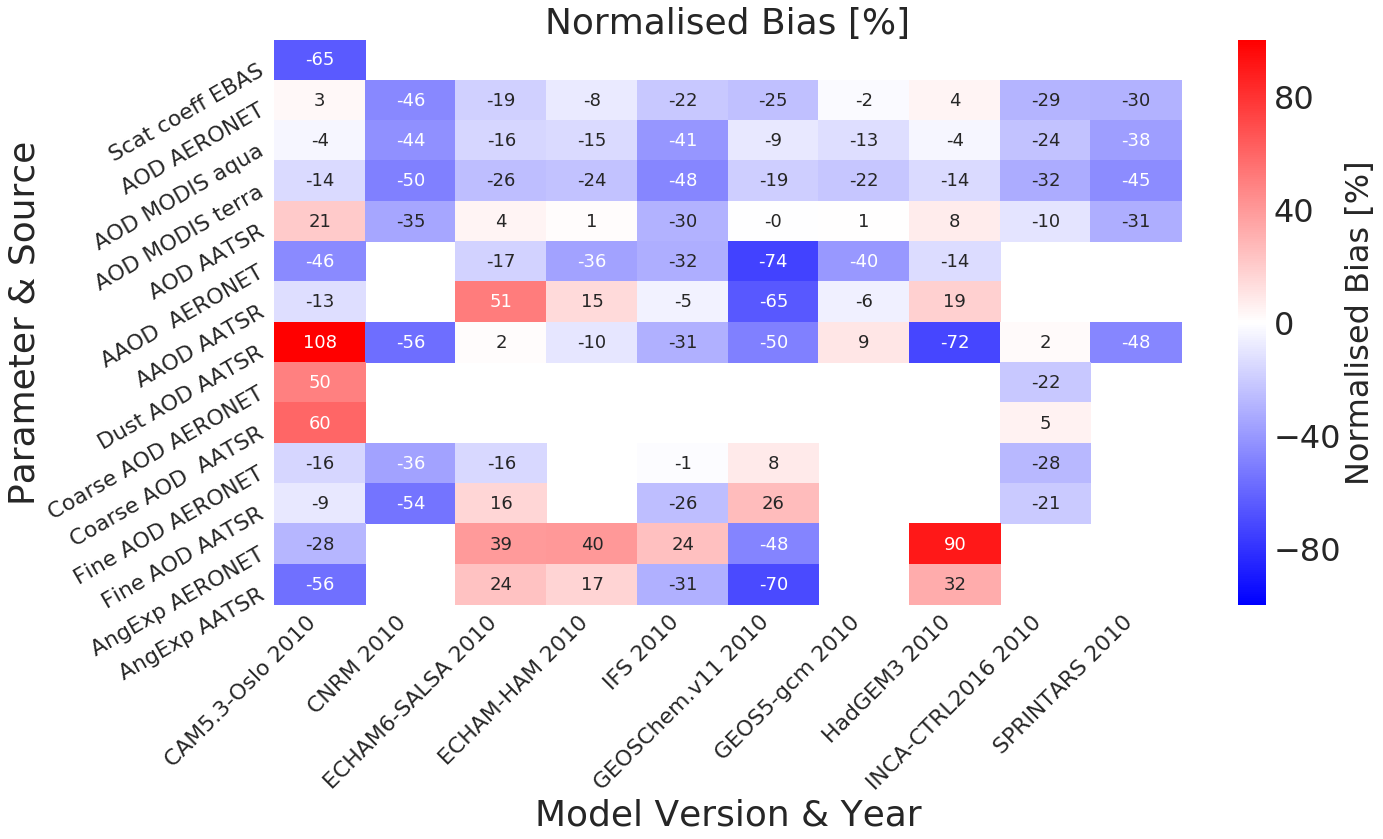

In [22]:
from helpers.io import plot_heatmap
ax = plot_heatmap(table, colname='nmb', ts_type='monthly', color_rowwise=False, cbar=True,
                  figsize=(20, 12), center=0, vmin=-100, vmax=100, table_name='Normalised Bias [%]',
                  row_order=VAR_OBS_SELECTION) #THIS IS NEW AND DOES THE REORDERING OF VAR / OBS COMBINATIONS
        
# here you can edit the labelling, etc. should be self-explanatory
ax = update_labels(ax, PLOT_XLABELS, PLOT_YLABELS, #update x and y-labels according to settings above
                   fontsize=22, #fontsize
                   xrotation=45, 
                   yrotation=30)
ax = change_fontsize_colorbar(ax, 32) # change fontsize colorbar
ax.set_ylabel('Parameter & Source', fontsize=36)
ax.set_xlabel('Model Version & Year', fontsize=36)

ax.set_title('Normalised Bias [%]', fontsize=36)
ax.figure.tight_layout()
# save figure
savename = 'heatmap_nmb_selection_monthly.png'
ax.figure.savefig(os.path.join(OUTPUT_DIR, savename))

Reordering row indices according to input selection


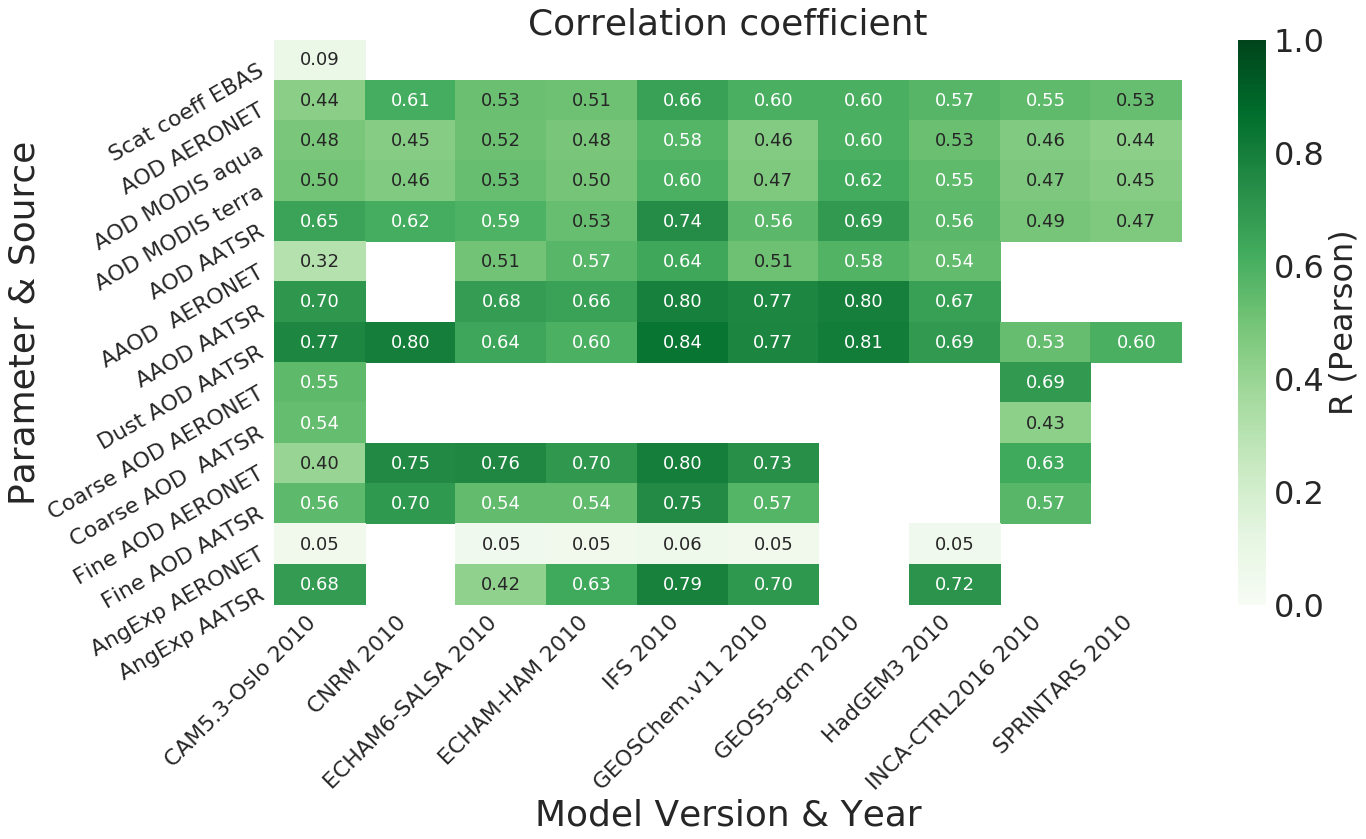

In [23]:
ax= plot_heatmap(table, colname='R', ts_type='monthly', cmap='Greens', vmin=0, vmax=1, num_digits=2, 
                 color_rowwise=False, table_name='R (Pearson)', figsize=(20, 12), cbar=True,
                 row_order=VAR_OBS_SELECTION) #THIS IS NEW AND DOES THE REORDERING OF VAR / OBS COMBINATIONS

# here you can edit the labelling, etc. should be self-explanatory
ax = update_labels(ax, PLOT_XLABELS, PLOT_YLABELS, #update x and y-labels according to settings above
                   fontsize=22, #fontsize
                   xrotation=45, 
                   yrotation=30)
ax = change_fontsize_colorbar(ax, 32) # change fontsize colorbar
ax.set_ylabel('Parameter & Source', fontsize=36)
ax.set_xlabel('Model Version & Year', fontsize=36)
ax.set_title('Correlation coefficient', fontsize=36)

ax.figure.tight_layout()
# save figure
savename = 'heatmap_R_selection_monthly.png'

ax.figure.savefig(os.path.join(OUTPUT_DIR, savename))

Reordering row indices according to input selection


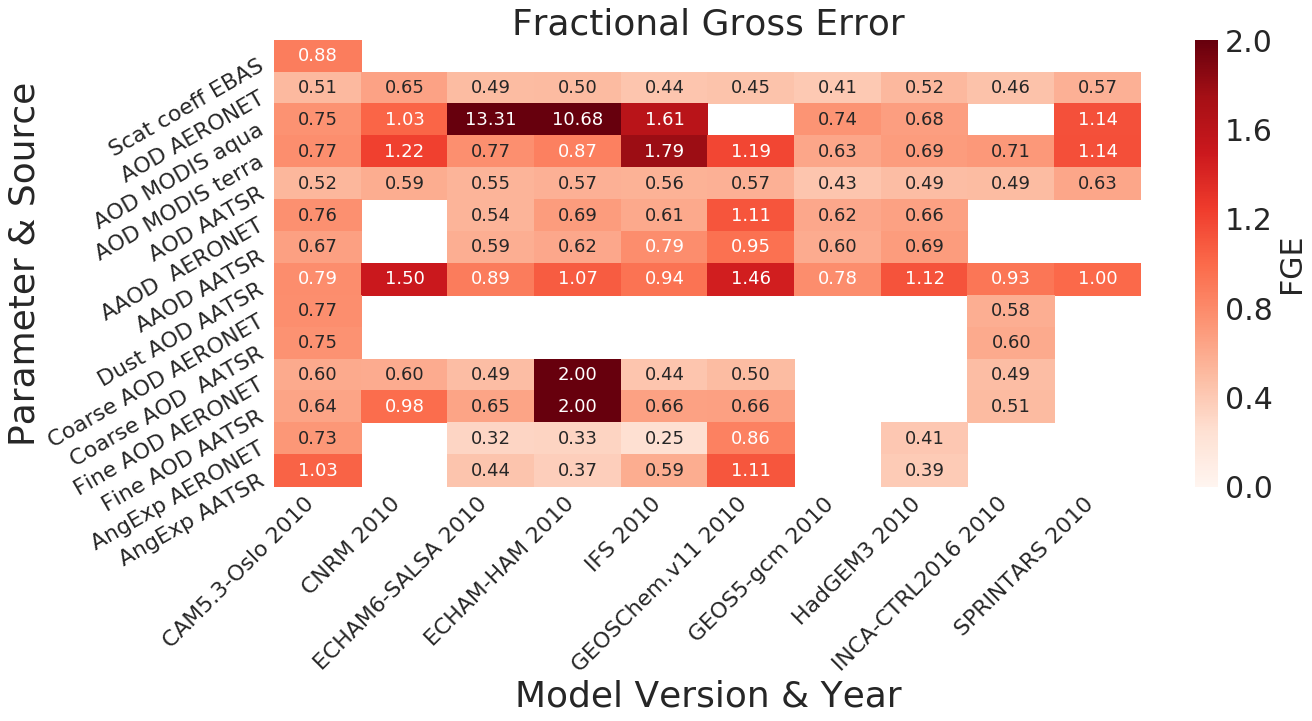

In [24]:
ax = plot_heatmap(table, colname='fge', ts_type='monthly', color_rowwise=False, cbar=True,
                  cmap='Reds', center=0,
                  figsize=(20, 12), vmin=0, vmax=2, table_name='FGE', num_digits=2,
                  row_order=VAR_OBS_SELECTION) #THIS IS NEW AND DOES THE REORDERING OF VAR / OBS COMBINATIONS
        
# here you can edit the labelling, etc. should be self-explanatory
ax = update_labels(ax, PLOT_XLABELS, PLOT_YLABELS, #update x and y-labels according to settings above
                   fontsize=22, #fontsize
                   xrotation=45, 
                   yrotation=30)
ax = change_fontsize_colorbar(ax, 30) # change fontsize colorbar
ax.set_ylabel('Parameter & Source', fontsize=36)
ax.set_xlabel('Model Version & Year', fontsize=36)
ax.set_title('Fractional Gross Error', fontsize=36)

# save figure
savename = 'heatmap_fge_selection_monthly.png'
ax.figure.savefig(os.path.join(OUTPUT_DIR, savename))

Reordering row indices according to input selection


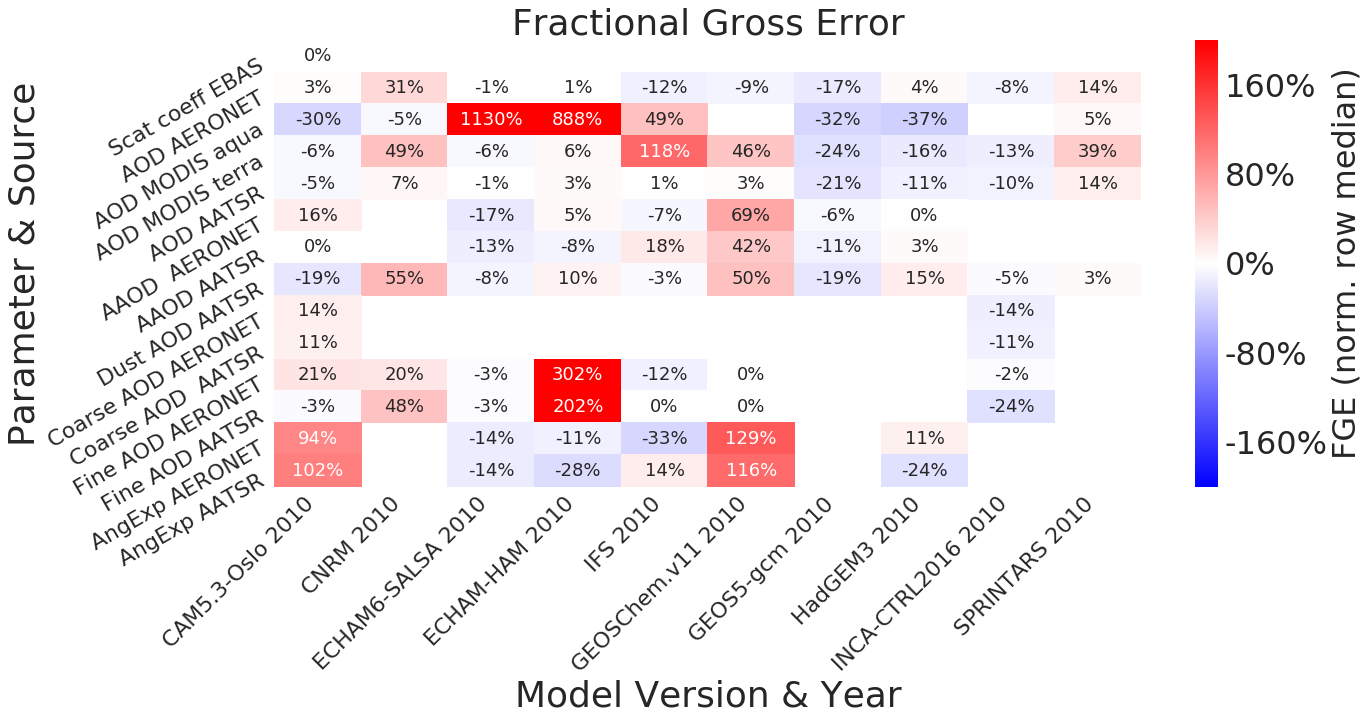

In [25]:
ax = plot_heatmap(table, colname='fge', ts_type='monthly', color_rowwise=False, cbar=True,
                  cmap='bwr', center=0,
                  figsize=(20, 12), vmin=-2, vmax=2, table_name='FGE', num_digits=2,
                  normalise_rows=True,
                  normalise_rows_how='median', # THIS IS NEW AND DOES NORMALISATION
                  row_order=VAR_OBS_SELECTION) #THIS IS NEW AND DOES THE REORDERING OF VAR / OBS COMBINATIONS
        
# here you can edit the labelling, etc. should be self-explanatory
ax = update_labels(ax, PLOT_XLABELS, PLOT_YLABELS, #update x and y-labels according to settings above
                   fontsize=22, #fontsize
                   xrotation=45, 
                   yrotation=30)
ax = change_fontsize_colorbar(ax, 32) # change fontsize colorbar
ax.set_ylabel('Parameter & Source', fontsize=36)
ax.set_xlabel('Model Version & Year', fontsize=36)
ax.set_title('Fractional Gross Error', fontsize=36)

# save figure
savename = 'heatmap_fge_NORM_selection_monthly.png'
ax.figure.savefig(os.path.join(OUTPUT_DIR, savename))

Reordering row indices according to input selection


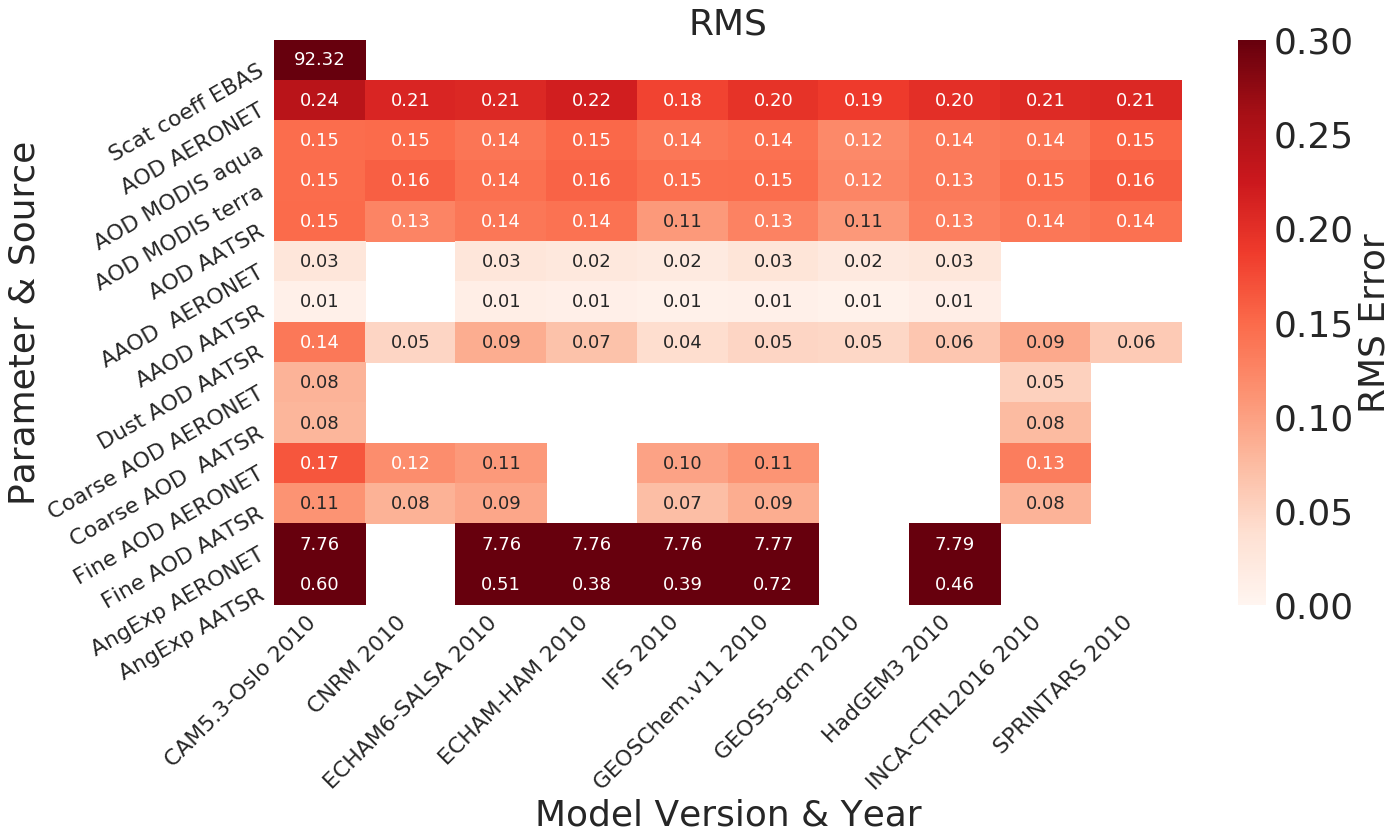

In [26]:
#entryname = 'Correlation'
#ax= plot_heatmap(table, colname='R', ts_type='monthly', cmap='Greens', vmin=0, vmax=1, num_digits=2, 
#                 color_rowwise=False, table_name=entryname, figsize=(20, 12), cbar=True)
#savename = 'heatmap_'+ entryname + '_all_monthly.png'

#entryname = 'Bias'
#ax = plot_heatmap(table, colname='nmb', ts_type='monthly', color_rowwise=False, cbar=True,
#                  figsize=(20, 12), center=0, vmin=-100, vmax=100, table_name='Normalised Bias [%]')
#savename = 'heatmap_'+ entryname + '_all_monthly.png'

#entryname = 'FGE'
#ax = plot_heatmap(table, colname='fge', ts_type='monthly', color_rowwise=False, cbar=True,cmap='Greens',
#                 figsize=(20, 12), center=0, vmin=0, vmax=100, table_name='Fractional Gross Error [%]')
#savename = 'heatmap_'+ entryname + '_all_monthly.png'

entryname = 'RMS'
ax = plot_heatmap(table, colname='rms', ts_type='monthly', color_rowwise=False, cmap='Reds',cbar=True, num_digits=2,
                  figsize=(20, 12), center=0, vmin=0, vmax=.3, table_name='RMS Error',
                  row_order=VAR_OBS_SELECTION) #THIS IS NEW AND DOES THE REORDERING OF VAR / OBS COMBINATIONS
savename = 'heatmap_'+ entryname + '_selection_monthly.png'


# here you can edit the labelling, etc. should be self-explanatory
ax = update_labels(ax, PLOT_XLABELS, PLOT_YLABELS, #update x and y-labels according to settings above
                   fontsize=22, #fontsize
                   xrotation=45, 
                   yrotation=30)
ax = change_fontsize_colorbar(ax, 36) # change fontsize colorbar
ax.set_ylabel('Parameter & Source', fontsize=36)
ax.set_xlabel('Model Version & Year', fontsize=36)
ax.set_title(entryname, fontsize=36)
ax.figure.tight_layout()
# save figure
ax.figure.savefig(os.path.join(OUTPUT_DIR, savename))

Reordering row indices according to input selection


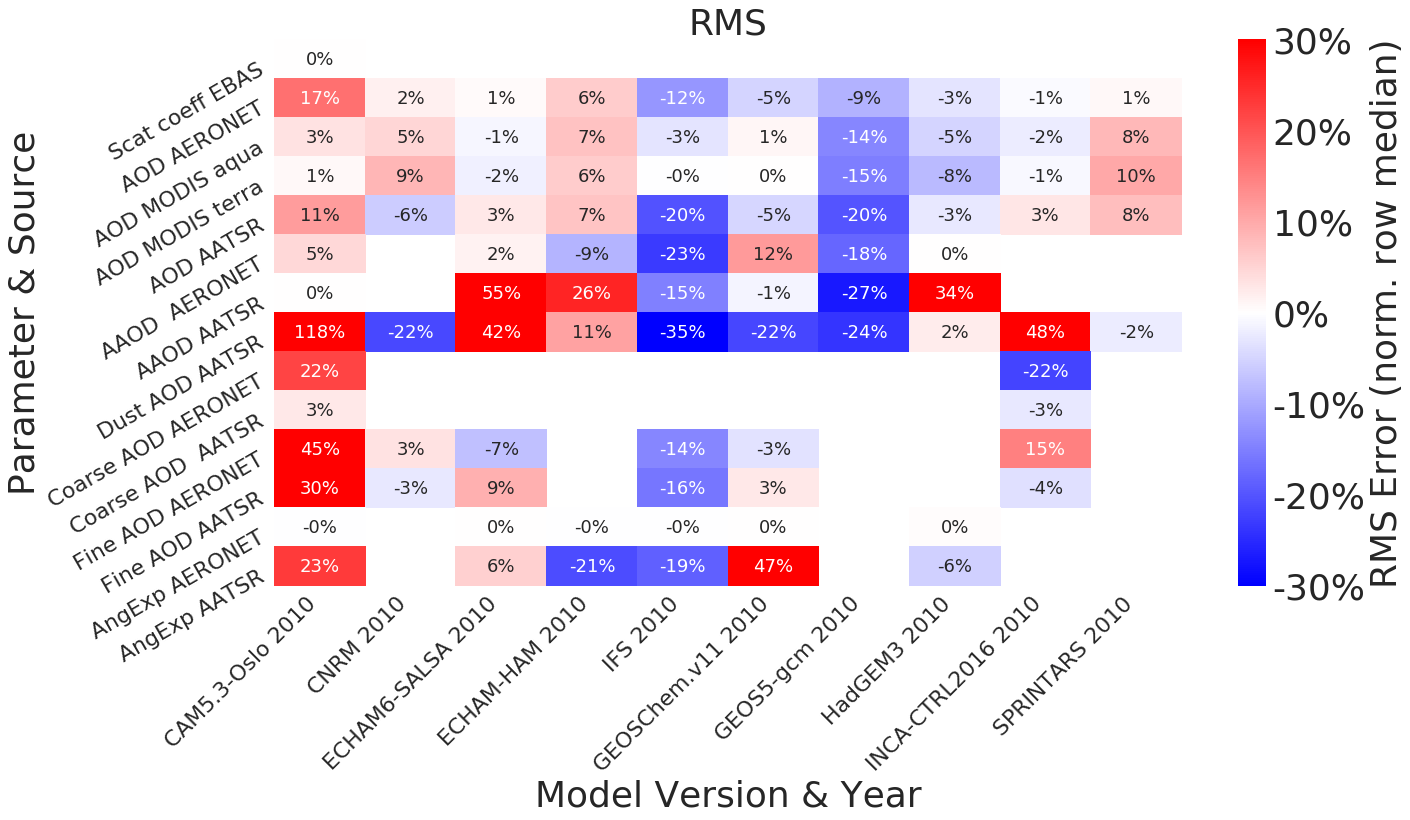

In [27]:
#entryname = 'Correlation'
#ax= plot_heatmap(table, colname='R', ts_type='monthly', cmap='Greens', vmin=0, vmax=1, num_digits=2, 
#                 color_rowwise=False, table_name=entryname, figsize=(20, 12), cbar=True)
#savename = 'heatmap_'+ entryname + '_all_monthly.png'

#entryname = 'Bias'
#ax = plot_heatmap(table, colname='nmb', ts_type='monthly', color_rowwise=False, cbar=True,
#                  figsize=(20, 12), center=0, vmin=-100, vmax=100, table_name='Normalised Bias [%]')
#savename = 'heatmap_'+ entryname + '_all_monthly.png'

#entryname = 'FGE'
#ax = plot_heatmap(table, colname='fge', ts_type='monthly', color_rowwise=False, cbar=True,cmap='Greens',
#                 figsize=(20, 12), center=0, vmin=0, vmax=100, table_name='Fractional Gross Error [%]')
#savename = 'heatmap_'+ entryname + '_all_monthly.png'

entryname = 'RMS'
ax = plot_heatmap(table, colname='rms', ts_type='monthly', color_rowwise=False, cmap='bwr',cbar=True, num_digits=2,
                  figsize=(20, 12), center=0, vmin=-.3, vmax=.3, table_name='RMS Error',
                  normalise_rows=True,
                  normalise_rows_how='median', # THIS IS NEW AND DOES NORMALISATION
                  row_order=VAR_OBS_SELECTION) #THIS IS NEW AND DOES THE REORDERING OF VAR / OBS COMBINATIONS
savename = 'heatmap_'+ entryname + '_NORM_selection_monthly.png'


# here you can edit the labelling, etc. should be self-explanatory
ax = update_labels(ax, PLOT_XLABELS, PLOT_YLABELS, #update x and y-labels according to settings above
                   fontsize=22, #fontsize
                   xrotation=45, 
                   yrotation=30)
ax = change_fontsize_colorbar(ax, 36) # change fontsize colorbar
ax.set_ylabel('Parameter & Source', fontsize=36)
ax.set_xlabel('Model Version & Year', fontsize=36)
ax.set_title(entryname, fontsize=36)
ax.figure.tight_layout()
# save figure
ax.figure.savefig(os.path.join(OUTPUT_DIR, savename))